<a href="https://colab.research.google.com/github/VamsiMalla13/Vamsi_INFO5731_Spring2020-/blob/main/INFO5731_Assignment_Three_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [1]:
# Write your code here



#installing selenium package
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium


Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran4

In [2]:
from selenium import webdriver #importing selenium package
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [3]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options) #creating a driver path
link = 'https://www.imdb.com/title/tt9376612/reviews?ref_=tt_sa_3'
title_array = [] 
review_array = []
driver.get(link)
#giving range 45 to get all reviews
for num in range(45): 
  driver.find_element_by_class_name("ipl-load-more__button").click() 
#giving class name as ipl-load-mote__button to fix for pagenation
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
#creating a for loop to append each review and title into the empty arrays created
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
df = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  del sys.path[0]


Length of data frame is 1150


,Title,Review
0,SATISFIES THE HYPE!!!,What an amazing movie by Marvel Studios! I was...
1,Fun and entertaining,Finally! A fun and entertaining movie without ...
2,Surprisingly good,I'll be honest - Marvel movies are not in my t...
3,A new standard!,The goal of an MCU solo film is to sell the au...
4,Shang-Chi and the Legend of the Ten Rings,6/10 - I seem to be the only one to not be mar...
...,...,...
1145,Must watch,It was my first movie in theaters after Endgam...
1146,Best Marvel movie I ever watch,I am a Chinese. I have seen Jackie Chan's mart...
1147,So much Better than black widow by far,
1148,1 star per ring!,10/10\n\nAn excellent story superbly told. Flo...


In [4]:
import nltk
nltk.download()




NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [5]:
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [6]:
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [7]:
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))


In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [9]:
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

In [10]:
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

In [14]:
from textblob import Word
import nltk
nltk.download('wordnet')

df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.to_csv('/content/sample_data/reviwes.csv',index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['After Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

In [16]:
from textblob import Word
import nltk
nltk.download('wordnet')

df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.to_csv('/content/sample_data/reviwes.csv',index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('amaz', 'movi', 'marvel'): 1,
          ('movi', 'marvel', 'studi'): 2,
          ('marvel', 'studi', 'hope'): 1,
          ('studi', 'hope', 'movi'): 1,
          ('hope', 'movi', 'sinc'): 1,
          ('movi', 'sinc', 'first'): 1,
          ('sinc', 'first', 'tea'): 1,
          ('first', 'tea', 'movi'): 1,
          ('tea', 'movi', 'actual'): 1,
          ('movi', 'actual', 'exceed'): 1,
          ('actual', 'exceed', 'expect'): 1,
          ('exceed', 'expect', 'marvel'): 1,
          ('expect', 'marvel', 'show'): 1,
          ('marvel', 'show', 'marvel'): 1,
          ('show', 'marvel', 'magic'): 1,
          ('marvel', 'magic', 'sinc'): 1,
          ('magic', 'sinc', 'roman'): 1,
          ('sinc', 'roman', 'shangchi'): 1,
          ('roman', 'shangchi', 'anoth'): 1,
          ('shangchi', 'anoth', 'diamond'): 1,
          ('anoth', 'diamond', 'crown'): 1,
          ('diamond', 'crown', 'end'): 1,
          ('crown', 'end', 'mucu'): 1,
          ('end', 'mucu', 'phase'

In [18]:
whole_dataset = ''
index = []
i = 1
for line in df['After Lemmatization']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [19]:
from textblob import TextBlob
noun_phrases = []
frequency = []
for line in df['After Lemmatization']:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in df['After Lemmatization']:
    noun_phrases_freq.append(line.count(word) / whole_dataset.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = index
noun_phrases_df  

,amaz movi,studi hope movi sinc,tea movi,magic sinc roman shangchi anoth diamond crown end mucu phase,fan eagerli,big movi,black widow mark etern,disappoint major fan changchi,gap action scene,fresh engag martial art combin chine mytholog power,...,toni chiuwai lung play father lung carri,whole film opinion whenev emot scene father son lung way,express show,situ lie,visual effect,especi film mani custom,sometim color repres shangchi cultur,footbal varieti jacket,red grey shangchi,minut film
Review-1,0.111111,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Review-2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Review-3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Review-4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Review-5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.023256,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-1146,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Review-1147,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Review-1148,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Review-1149,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [20]:
# Write your code here
# Write your code here
import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = df["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,token,0,1,2,3,4,5,6,7,8,...,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149
0,,0.056983,0.15497,0.048738,0.086004,0.113373,0.0,0.090575,0.036335,0.180537,...,0.054775,0.298627,0.069111,0.0,0.128755,0.099542,0.088992,0.0,0.066567,0.023395
1,giants,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,ordinary,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,finest,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,blend,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,viewer,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5711,authority,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5712,sexual,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5713,rather,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [21]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
query_sentence = 'Shang-Chi and the Legend of the Ten Rings is an Action - Fantasy movie in which we watch a new era of Marvel Studios rise with Shang-Chi,the master of Kung Fu. He has to face his past involving him with the Ten Rings organization and crate his future accordingly.Finally, I have to say that "Shang-Chi and the Legend of the Ten Rings" is an amazing movie and I strongly recommend everyone to watch it, especially the fans of Marvel.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}


In [25]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

In [26]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine

In [27]:
similarity_list = []
for sentence in df['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,What an amazing movie by Marvel Studios! I was...,0.041425
1,Finally! A fun and entertaining movie without ...,0.038749
2,I'll be honest - Marvel movies are not in my t...,0.037966
3,The goal of an MCU solo film is to sell the au...,0.106676
4,6/10 - I seem to be the only one to not be mar...,0.031068
...,...,...
1145,It was my first movie in theaters after Endgam...,0.122113
1146,I am a Chinese. I have seen Jackie Chan's mart...,0.027789
1147,,None
1148,10/10\n\nAn excellent story superbly told. Flo...,0.021969


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [41]:
# Write your code here

!pip install --upgrade gensim





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


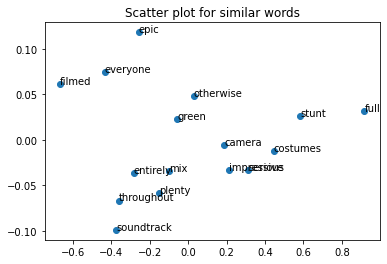

In [76]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
from nltk.corpus import stopwords
nltk.download('stopwords')
from gensim.models import Word2Vec
import csv

INPUT_FILE_PATH = "/content/review_data.csv"

def read_lines_from_csv(filepath):
    lines = []
    with open(filepath) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader, None)
        for row in csv_reader:
            lines.append(row[1].lower().replace('.', ' ').replace('-', ' ').replace(',', ' '))
    return lines
    
 
lines = read_lines_from_csv(INPUT_FILE_PATH)

tokenised_lines = []
stop_words = set(stopwords.words('english'))
for line in lines:
    tokens = line.split()
    tokens = [token for token in tokens if not token.lower() in stop_words]
    tokenised_lines.append(tokens)
lines = tokenised_lines
model = Word2Vec(sentences = lines,  window = 3)

topn = 4
batch_size = 4
unique_words = list(model.wv.index_to_key)
sampled_words = random.choices(unique_words, k=batch_size)

all_words = []
two_dimensional_data = []
for sample_word in sampled_words:
    similar_words = model.wv.most_similar(sample_word, topn=topn)
    similar_words = [word[0] for word in similar_words]
    word_vectors = np.array([model.wv[word] for word in similar_words])

    all_words.extend(similar_words)
    two_dimensional_data.extend(PCA(random_state=0).fit_transform(word_vectors)[:,:2])

x = [point[0] for point in two_dimensional_data]
y = [point[1] for point in two_dimensional_data]

plt.scatter(x, y)
plt.title('Scatter plot for similar words')

for i in range(len(all_words)):
    plt.annotate(all_words[i], (x[i], y[i]))
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link:https://github.com/VamsiMalla13/Vamsi_INFO5731_Spring2020-/blob/main/Sentimental%20analysis_vamsimalla.csv



